In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from sklearn.cluster import KMeans
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
    unittest.main(argv=[''], verosity=1, exit=False)

In [52]:
df_train = pd.read_csv('housing.csv')

In [53]:
df_train.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [54]:
X=df_train.loc[:,['parcelid','latitude','longitude']]
X.head(10)

C:\Users\eloba\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,parcelid,latitude,longitude
0,NaN,37.88,-122.23
1,NaN,37.86,-122.22
2,NaN,37.85,-122.24
3,NaN,37.85,-122.25
4,NaN,37.85,-122.25
5,NaN,37.85,-122.25
6,NaN,37.84,-122.25
7,NaN,37.84,-122.25
8,NaN,37.84,-122.26
9,NaN,37.84,-122.25


<function matplotlib.pyplot.show(*args, **kw)>

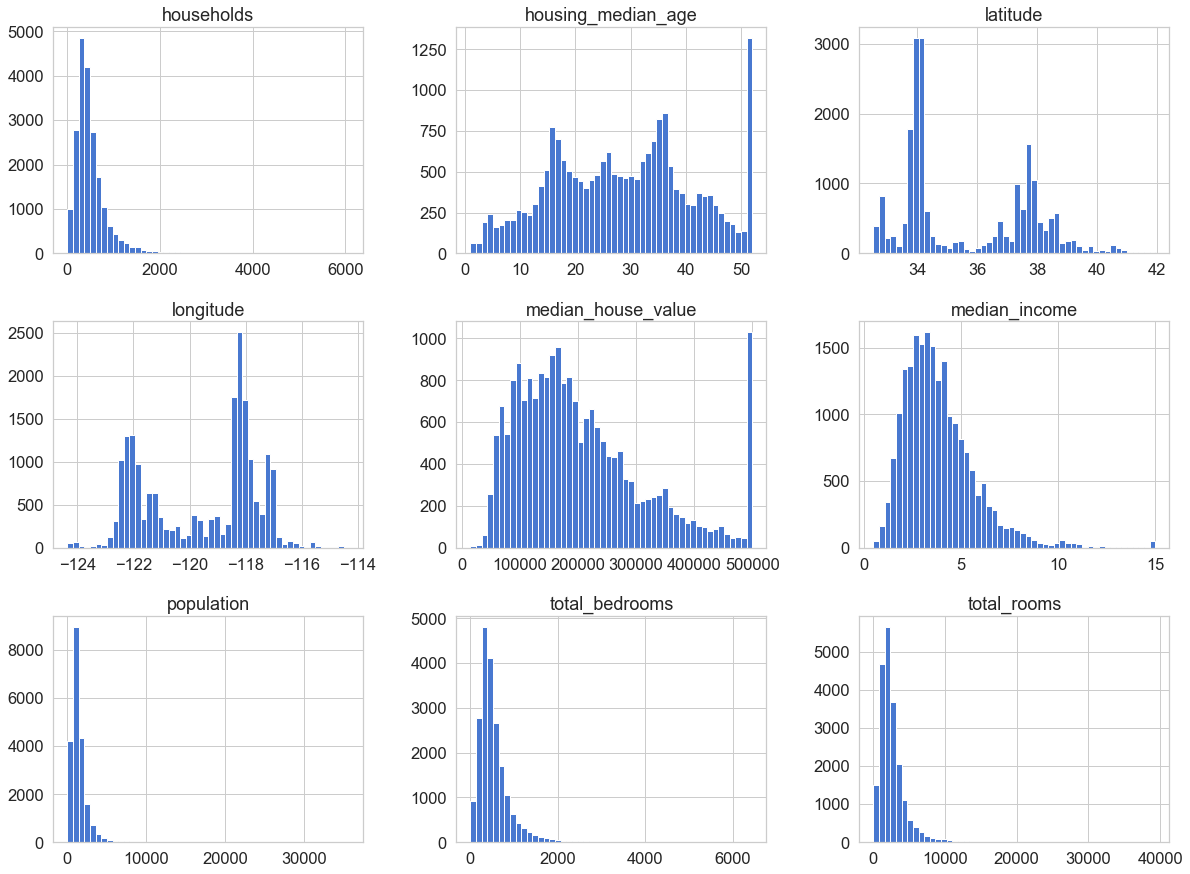

In [55]:
df_train.hist(bins=50, figsize=(20,15))
plt.show


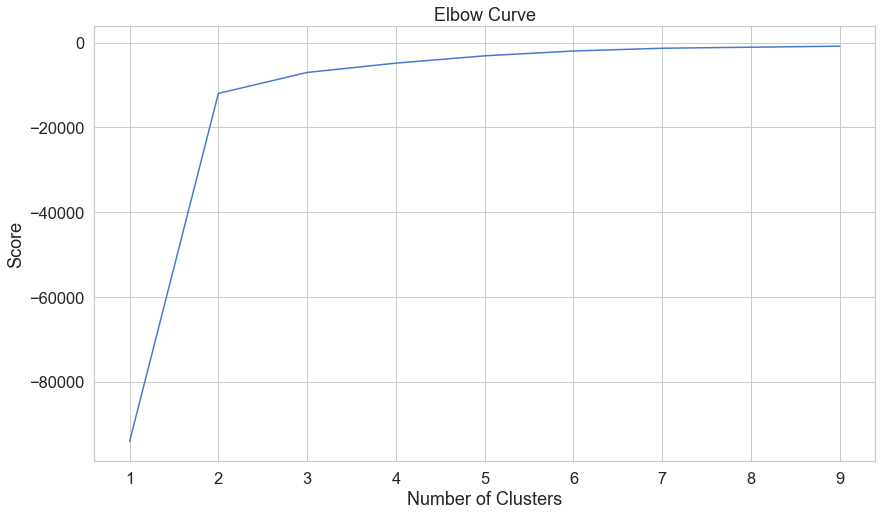

In [56]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_train[['latitude']]
X_axis = df_train[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 58, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,parcelid,latitude,longitude,cluster_label
0,NaN,37.88,-122.23,13
1,NaN,37.86,-122.22,13
2,NaN,37.85,-122.24,13
3,NaN,37.85,-122.25,13
4,NaN,37.85,-122.25,13
5,NaN,37.85,-122.25,13
6,NaN,37.84,-122.25,13
7,NaN,37.84,-122.25,13
8,NaN,37.84,-122.26,13
9,NaN,37.84,-122.25,13


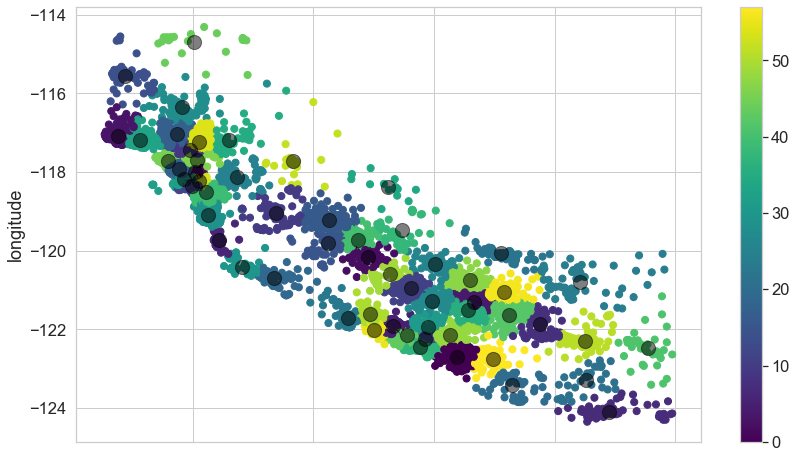

In [58]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [59]:
kmeans.cluster_centers_

array([[  38.38747826, -122.69773913],
       [  34.04601375, -118.004811  ],
       [  36.91303371, -120.1547191 ],
       [  32.75421677, -117.09110923],
       [  38.66919481, -121.29361039],
       [  37.32478905, -121.92600912],
       [  34.4302994 , -119.72718563],
       [  40.90111111, -124.10881481],
       [  39.76478261, -121.86369565],
       [  33.96286567, -117.43585075],
       [  35.38859016, -119.03780328],
       [  37.62051988, -120.95926606],
       [  33.98203367, -118.36490236],
       [  37.84401408, -122.24353286],
       [  32.88267241, -115.55534483],
       [  36.24657658, -119.79495495],
       [  36.26343511, -119.21961832],
       [  33.743375  , -117.039     ],
       [  33.78096104, -117.92452814],
       [  35.35335878, -120.70122137],
       [  39.30141026, -123.40948718],
       [  40.52852941, -123.30029412],
       [  39.10318182, -120.06945455],
       [  36.57357955, -121.724375  ],
       [  40.4175    , -120.79625   ],
       [  34.72695652, -1

In [60]:
X = X[['parcelid','cluster_label']]
X.head(5)

,parcelid,cluster_label
0,NaN,13
1,NaN,13
2,NaN,13
3,NaN,13
4,NaN,13


In [61]:
clustered_data = df_train.merge(X, left_on='cluster_label', right_on='cluster_label')
clustered_data.head(5)

KeyError: 'cluster_label'